In [26]:
import numpy as np
import torch
import torch.nn.functional as F
import seaborn as sns
import matplotlib.pyplot as plt

In [163]:
# import names from names.txt
names = []

with open('first_name.txt') as f:
    names = f.readlines()
    names = [f'.{name.lower().strip()}.' for name in names]

for name in names[:10]:
    print(name)

FileNotFoundError: [Errno 2] No such file or directory: 'first_name.txt'

In [28]:
itos = 'abcdefghijklmnopqrstuvwxyz.'
stoi = {c: i for i, c in enumerate(itos)}

In [29]:
N = np.zeros((27, 27))  

for name in names:
    for ch1, ch2 in zip(name, name[1:]):
        i, j = stoi[ch1], stoi[ch2]
        N[i][j] += 1

N = torch.tensor(N).float()
N = N / N.sum(axis=1, keepdims=True)
N[0]

tensor([0.0164, 0.0160, 0.0139, 0.0308, 0.0204, 0.0040, 0.0050, 0.0688, 0.0487,
        0.0052, 0.0168, 0.0746, 0.0482, 0.1605, 0.0019, 0.0024, 0.0018, 0.0963,
        0.0330, 0.0203, 0.0112, 0.0246, 0.0048, 0.0054, 0.0605, 0.0128, 0.1960])

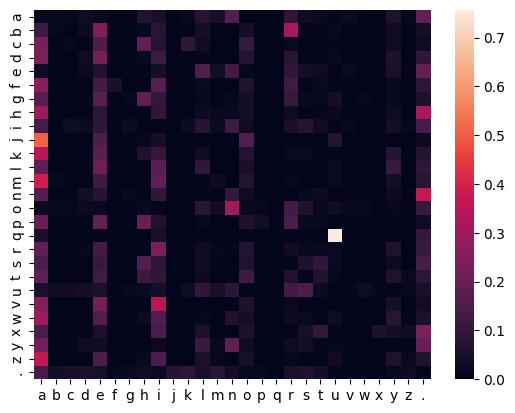

In [30]:
sns.heatmap(N, xticklabels=itos, yticklabels=itos)
plt.show()

In [162]:
for _ in range(10):
    name = ['.']
    
    while True:
        i = stoi[name[-1]]
        p = N[i]
        j = torch.multinomial(p, 1).item()
        name.append(itos[j])
        if name[-1] == '.':
            break
            
    print(''.join(name))

.jagri.
.c.
.m.
.ein.
.a.
.me.
.mi.
.davr.
.macharar.
.ias.


In [159]:
ll = 0
count = 0
for name in names:
    for ch1, ch2 in zip(name, name[1:]):
        i, j = stoi[ch1], stoi[ch2]
        ll += N[i][j].log()
        count += 1
        
nll = -ll / count
nll.item()

2.454094171524048

In [130]:
W = torch.randn(27, 27, requires_grad=True)

x = torch.tensor([])
y = torch.tensor([])

for name in names:
    for ch1, ch2 in zip(name, name[1:]):
        i, j = stoi[ch1], stoi[ch2]
        x = torch.cat([x, torch.tensor([i]).float()])
        y = torch.cat([y, torch.tensor([j]).float()])
        
# one hot
x = F.one_hot(x.long(), 27).float()
y = y.long()
        
x.shape, y.shape

(torch.Size([228146, 27]), torch.Size([228146]))

In [158]:
for _ in range(100):
    logits = x @ W
    counts = logits.exp()
    probs = counts / counts.sum(dim=1, keepdim=True)
    loss = -probs[torch.arange(y.shape[0]), y].log().mean()
    print(loss)
    
    W.grad = None
    loss.backward()
    
    W.data -= 0.1 * W.grad
    

tensor(2.4647, grad_fn=<NegBackward0>)
tensor(2.4647, grad_fn=<NegBackward0>)
tensor(2.4647, grad_fn=<NegBackward0>)
tensor(2.4647, grad_fn=<NegBackward0>)
tensor(2.4647, grad_fn=<NegBackward0>)
tensor(2.4647, grad_fn=<NegBackward0>)
tensor(2.4647, grad_fn=<NegBackward0>)
tensor(2.4647, grad_fn=<NegBackward0>)
tensor(2.4647, grad_fn=<NegBackward0>)
tensor(2.4647, grad_fn=<NegBackward0>)
tensor(2.4647, grad_fn=<NegBackward0>)
tensor(2.4647, grad_fn=<NegBackward0>)
tensor(2.4647, grad_fn=<NegBackward0>)
tensor(2.4647, grad_fn=<NegBackward0>)
tensor(2.4647, grad_fn=<NegBackward0>)
tensor(2.4647, grad_fn=<NegBackward0>)
tensor(2.4647, grad_fn=<NegBackward0>)
tensor(2.4647, grad_fn=<NegBackward0>)
tensor(2.4647, grad_fn=<NegBackward0>)
tensor(2.4647, grad_fn=<NegBackward0>)
tensor(2.4647, grad_fn=<NegBackward0>)
tensor(2.4647, grad_fn=<NegBackward0>)
tensor(2.4647, grad_fn=<NegBackward0>)
tensor(2.4647, grad_fn=<NegBackward0>)
tensor(2.4647, grad_fn=<NegBackward0>)
tensor(2.4647, grad_fn=<N

In [161]:
for _ in range(10):
    name = ['.']
    
    while True:
        i = stoi[name[-1]]
        p = F.softmax(W[i], dim=0)
        j = torch.multinomial(p, 1).item()
        name.append(itos[j])
        if name[-1] == '.':
            break
            
    print(''.join(name))

.ka.
.jisami.
.ethali.
.dm.
.kia.
.hanaysamiziqustriniah.
.ta.
.bikna.
.yuoros.
.pes.
